# RANG COMPETITION SCRIPT
## Authors: Aditya Samalla and Srinivasa Rudraraju
## Arizona State University - Class of 2016
<li> Exploratory Data Analysis
<li> Preprocessing 
<li> Standadization 
<li> Principal Component Analysis 
<li> Build and Score Machine Learning Models
<li> Finalize Machine Learning Model

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cust_status = preprocessing.LabelEncoder()

In [2]:
#Load Datasets
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

In [3]:
#Training Data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25766 entries, 0 to 25765
Columns: 257 entries, Cust_id to Active_Customer
dtypes: float64(234), int64(17), object(6)
memory usage: 50.7+ MB


In [4]:
#Total Training Columns
cols = df_train.columns
#Columns with Numeric Values
num_cols = df_train._get_numeric_data().columns
#Categorical columns that need to be encoded
list(set(cols)-set(num_cols))

['Trans25', 'Trans27', 'Cust_id', 'Cust_status', 'Trans26', 'Trans24']

In [5]:
#Encode categorical features into numerical
cat_encoder = LabelEncoder()
cat1_encoder = LabelEncoder()
cat2_encoder = LabelEncoder()
cat3_encoder = LabelEncoder()
cat4_encoder = LabelEncoder()
cat_encoder.fit(df_train["Trans24"])
cat1_encoder.fit(df_train["Trans25"])
cat2_encoder.fit(df_train["Trans26"])
cat3_encoder.fit(df_train["Trans27"])
cat4_encoder.fit(df_train["Cust_status"])
df_train["Trans24"] = cat_encoder.transform(df_train["Trans24"])
df_train["Trans25"] = cat1_encoder.transform(df_train["Trans25"])
df_train["Trans26"] = cat2_encoder.transform(df_train["Trans26"])
df_train["Trans27"] = cat3_encoder.transform(df_train["Trans27"])
df_train["Cust_status"] = cat4_encoder.transform(df_train["Cust_status"])
cat_encoder = LabelEncoder()
cat1_encoder = LabelEncoder()
cat2_encoder = LabelEncoder()
cat3_encoder = LabelEncoder()
cat4_encoder = LabelEncoder()
cat_encoder.fit(df_test["Trans24"])
cat1_encoder.fit(df_test["Trans25"])
cat2_encoder.fit(df_test["Trans26"])
cat3_encoder.fit(df_test["Trans27"])
cat4_encoder.fit(df_test["Cust_status"])
df_test["Trans24"] = cat_encoder.transform(df_test["Trans24"])
df_test["Trans25"] = cat1_encoder.transform(df_test["Trans25"])
df_test["Trans26"] = cat2_encoder.transform(df_test["Trans26"])
df_test["Trans27"] = cat3_encoder.transform(df_test["Trans27"])
df_test["Cust_status"] = cat4_encoder.transform(df_test["Cust_status"])

Missing Values filled by mean of the columns

In [6]:
#Fill missing values with mean in all columns 
df_train = df_train.where(pd.notnull(df_train), df_train.mean(), axis = "columns")
df_test = df_test.where(pd.notnull(df_test), df_test.mean(), axis = "columns")

### Cross-Vaidation and Feature Importance

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
X = df_train
y = X['Active_Customer']
X = X.drop(['Active_Customer'],axis=1)

In [9]:
###Build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [10]:
y_test

23551    0
22582    1
11728    1
3110     0
12025    1
12210    1
6978     1
13396    1
12981    0
14736    1
17729    1
12967    0
25499    1
23472    0
19646    1
20745    1
22862    0
22819    0
14438    0
18570    0
17567    1
25007    1
2153     1
14775    1
21210    0
1921     0
4715     0
3635     1
1675     0
11066    1
        ..
15676    0
9736     0
20096    0
5282     1
21070    1
15286    1
7095     0
11266    0
381      1
14503    1
24952    1
20262    1
25215    1
1676     1
714      1
2678     0
16261    1
19967    1
18422    1
13317    1
19591    1
22377    0
9480     0
3438     0
25409    1
7615     0
21290    0
3824     1
12134    1
1586     0
Name: Active_Customer, dtype: int64

In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

X_train_mod = X_train.drop(['Cust_id'],axis=1)
data_labels = df_train.columns[1:]

In [ ]:
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=1)
forest.fit(X_train_mod, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_mod.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, data_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train_mod.shape[1]), importances[indices], color='lightblue', align='center')

plt.xticks(range(X_train_mod.shape[1]), data_labels[indices], rotation=90)
plt.xlim([-1, X_train_mod.shape[1]])
plt.tight_layout()

plt.show()

In [11]:
X_test_mod = X_test.drop(['Cust_id'],axis=1)
df_test_mod = df_test.drop(['Cust_id'],axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_mod)
X_test_std = sc.transform(X_test_mod)
df_test_std = sc.transform(df_test_mod)

In [13]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[  3.50821816e+01 +0.00000000e+00j   1.23291438e+01 +0.00000000e+00j
   1.19911027e+01 +0.00000000e+00j   1.14039233e+01 +0.00000000e+00j
   9.67752766e+00 +0.00000000e+00j   9.55069222e+00 +0.00000000e+00j
   8.90339943e+00 +0.00000000e+00j   8.00224447e+00 +0.00000000e+00j
   7.55492607e+00 +0.00000000e+00j   6.82652883e+00 +0.00000000e+00j
   5.98040727e+00 +0.00000000e+00j   5.31055636e+00 +0.00000000e+00j
   4.31959408e+00 +0.00000000e+00j   3.66036155e+00 +0.00000000e+00j
   3.52943294e+00 +0.00000000e+00j   3.12133304e+00 +0.00000000e+00j
   3.03528902e+00 +0.00000000e+00j   2.87928310e+00 +0.00000000e+00j
   2.79957601e+00 +0.00000000e+00j   2.67638123e+00 +0.00000000e+00j
   2.61997840e+00 +0.00000000e+00j   2.51170138e+00 +0.00000000e+00j
   2.41434408e+00 +0.00000000e+00j   2.39759715e+00 +0.00000000e+00j
   2.38342868e+00 +0.00000000e+00j   2.26206286e+00 +0.00000000e+00j
   2.19995217e+00 +0.00000000e+00j   2.18091235e+00 +0.00000000e+00j
   2.10361912e+00 +0

In [14]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(tot)

(255.014139174+0j)


C:\Users\Srinivasa\Anaconda3\lib\site-packages\matplotlib\patches.py:642: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)
C:\Users\Srinivasa\Anaconda3\lib\site-packages\matplotlib\patches.py:640: ComplexWarning: Casting complex values to real discards the imaginary part
  self._y = float(xy[1])
C:\Users\Srinivasa\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


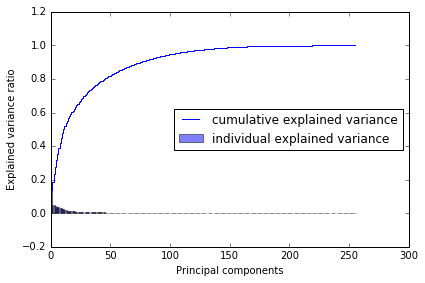

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 256), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 256), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

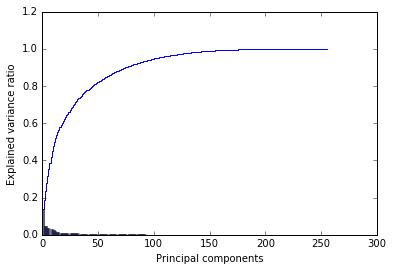

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
plt.bar(range(1, 256), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 256), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [32]:
pca = PCA(n_components=160)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
df_test_pca = pca.transform(df_test_std)

### Logistic Regression with PCA

In [33]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1 = lr1.fit(X_train_pca, y_train)

In [34]:
print('Training accuracy:', lr1.score(X_train_pca, y_train))
print('Test accuracy:', lr1.score(X_test_pca, y_test))

Training accuracy: 0.679640718563
Test accuracy: 0.663518758085


In [35]:
predict = lr1.predict(df_test_pca)

In [36]:
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_66.csv") #0.633152

### Logistic Regression without PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2 = lr2.fit(X_train_mod, y_train)

In [ ]:
print('Training accuracy:', lr2.score(X_train_mod, y_train))
print('Test accuracy:', lr2.score(X_test_mod, y_test))

In [ ]:
predict = lr2.predict(df_test_mod)

In [ ]:
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_11.csv") #0.656401

### Logistic Regression with Standardization and no PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
lr3 = LogisticRegression()
lr3 = lr3.fit(X_train_std, y_train)

In [ ]:
print('Training accuracy:', lr3.score(X_train_std, y_train))
print('Test accuracy:', lr3.score(X_test_std, y_test))

In [ ]:
predict = lr3.predict(df_test_std)

In [ ]:
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_18.csv") #0.658213

### Random Forest without PCA

In [ ]:
rf1 = RandomForestClassifier(n_estimators = 200, criterion = "entropy", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")

In [ ]:
rf1 = rf1.fit(X_train_mod, y_train)

In [ ]:
print('Training accuracy:', rf1.score(X_train_mod, y_train))
print('Test accuracy:', rf1.score(X_test_mod, y_test))

In [ ]:
predict = rf1.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_12.csv")#0.669686

### Random Forest with PCA and Standardization

In [37]:
rf2 = RandomForestClassifier(n_estimators = 200, criterion = "entropy", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")

In [38]:
rf2 = rf2.fit(X_train_pca, y_train)

C:\Users\Srinivasa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


In [39]:
print('Training accuracy:', rf2.score(X_train_pca, y_train))
print('Test accuracy:', rf2.score(X_test_pca, y_test))

Training accuracy: 0.999944555334
Test accuracy: 0.653686934023


In [41]:
predict = rf2.predict(df_test_pca)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_67.csv") #0.644022

### Random Forest with Standardization

In [ ]:
rf3 = RandomForestClassifier(n_estimators = 500, criterion = "entropy", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")

In [ ]:
rf3 = rf.fit(X_train_std, y_train)

In [ ]:
print('Training accuracy:', rf3.score(X_train_std, y_train))
print('Test accuracy:', rf3.score(X_test_std, y_test))

In [ ]:
predict = rf3.predict(df_test_std)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_14.csv") #0.666667

### Random Forest without PCA and n_estimators=500

In [ ]:
rf4 = RandomForestClassifier(n_estimators = 500, criterion = "entropy", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")

In [ ]:
rf4 = rf.fit(X_train_mod, y_train)

In [ ]:
print('Training accuracy:', rf4.score(X_train_mod, y_train))
print('Test accuracy:', rf4.score(X_test_mod, y_test))

In [ ]:
predict = rf4.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_15.csv") #0.665459

### Random Forest with Gini Index and Standardization

In [ ]:
rf5 = RandomForestClassifier(n_estimators = 200, criterion = "gini", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")

In [ ]:
rf5 = rf5.fit(X_train_std, y_train)

In [ ]:
print('Training accuracy:', rf5.score(X_train_std, y_train))
print('Test accuracy:', rf5.score(X_test_std, y_test))

In [ ]:
predict = rf5.predict(df_test_std)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_16.csv") #0.673007

### Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 200, learning_rate = 1.0, algorithm = "SAMME.R", random_state = 100)

In [ ]:
abc = abc.fit(X_train_mod, y_train)

In [ ]:
print('Training accuracy:', rf.score(X_train_mod, y_train))
print('Test accuracy:', rf.score(X_test_mod, y_test))

In [ ]:
predict = rf.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_17.csv") #0.532609

### Random Forest with no PCA, Standardization and n_estimators=200

In [24]:
rf6 = RandomForestClassifier(n_estimators = 150, criterion = "entropy", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")

In [25]:
rf6 = rf6.fit(X_train_std, y_train)

C:\Users\Srinivasa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


In [26]:
print('Training accuracy:', rf6.score(X_train_std, y_train))
print('Test accuracy:', rf6.score(X_test_std, y_test))

Training accuracy: 0.999944555334
Test accuracy: 0.675679172057


In [27]:
predict = rf6.predict(df_test_std)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_27.csv") #0.

### Random Forest with no PCA and n_estimators=200

In [28]:
rf7 = RandomForestClassifier(n_estimators = 150, criterion = "entropy", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")

In [29]:
rf7 = rf7.fit(X_train_mod, y_train)

C:\Users\Srinivasa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:452: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


In [30]:
print('Training accuracy:', rf7.score(X_train_mod, y_train))
print('Test accuracy:', rf7.score(X_test_mod, y_test))

Training accuracy: 0.999944555334
Test accuracy: 0.67490297542


In [31]:
predict = rf7.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_28.csv") #0.662742

### Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train_mod, y_train)

In [ ]:
print('Training accuracy:', gnb.score(X_train_mod, y_train))
print('Test accuracy:', gnb.score(X_test_mod, y_test))

In [ ]:
predict = gnb.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_23.csv") #0.571256

### Ensemble of the best 3 models

In [ ]:
lr2 = LogisticRegression()
rf3 = RandomForestClassifier(n_estimators = 500, criterion = "entropy", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")
rf5 = RandomForestClassifier(n_estimators = 200, criterion = "gini", max_depth = None,
                               max_features = "auto", bootstrap = True, oob_score = True,
                               warm_start = True, random_state = 100, class_weight = "balanced")

In [ ]:
#Drop 1st column in X
X_mod = X.drop(['Cust_id'],axis=1)

In [ ]:
from sklearn import cross_validation
from sklearn.ensemble import VotingClassifier

In [ ]:
eclf = VotingClassifier(estimators=[('lr', lr2), ('rf', rf3), ('rf', rf5)], voting='hard')

In [ ]:
for clf, label in zip([lr2, rf3, rf5, eclf], ['Logistic Regression', 'Random Forest-3', 'Random Forest-5', 'Ensemble']):
    scores = cross_validation.cross_val_score(clf, X_mod, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [ ]:
eclf # 0.67201

### Support Vector Machines without PCA and Standardization

In [ ]:
from sklearn import svm

In [ ]:
linear_svc = svm.SVC(kernel = 'linear')
rbf_svc = svm.SVC(kernel = 'rbf')

In [ ]:
linear_svc = linear_svc.fit(X_train_mod, y_train)
rbf_svc = rbf_svc.fit(X_train_mod, y_train)

In [ ]:
# Linear SVC
print('Training accuracy:', linear_svc.score(X_train_mod, y_train))
print('Test accuracy:', linear_svc.score(X_test_mod, y_test))
#RBF SVC
print('Training accuracy:', rbf_svc.score(X_train_mod, y_train))
print('Test accuracy:', rbf_svc.score(X_test_mod, y_test))

In [ ]:
predict = linear_svc.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_26.csv") #0.

In [ ]:
predict = linear_svc.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_27.csv") #0.

In [ ]:
poly_svc = svm.SVC(kernel = 'poly')
sigmoid_svc = svm.SVC(kernel = 'sigmoid')

In [ ]:
poly_svc = poly_svc.fit(X_train_mod, y_train)
sigmoid_svc = sigmoid_svc.fit(X_train_mod, y_train)

In [ ]:
# Plynomial SVC
print('Training accuracy:', poly_svc.score(X_train_mod, y_train))
print('Test accuracy:', poly_svc.score(X_test_mod, y_test))
#Sigmoid SVC
print('Training accuracy:', sigmoid_svc.score(X_train_mod, y_train))
print('Test accuracy:', sigmoid_svc.score(X_test_mod, y_test))

In [ ]:
predict = poly_svc.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_28.csv") #0.

In [ ]:
predict = sigmoid_svc.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_29.csv") #0.

In [19]:
from sklearn import svm
lin_clf = svm.LinearSVC()

In [20]:
lin_clf = lin_clf.fit(X_train_mod, y_train)

In [21]:
# Linear SVC
print('Training accuracy:', lin_clf.score(X_train_mod, y_train))
print('Test accuracy:', lin_clf.score(X_test_mod, y_test))

Training accuracy: 0.600964737192
Test accuracy: 0.594437257439


In [22]:
predict = lin_clf.predict(df_test_mod)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_26.csv") #0.554348

### Gradient Descent Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.15, max_depth=3, loss = 'deviance' , random_state=42)

In [61]:
gbc1 = gbc.fit(X_train_std, y_train)

In [62]:
# GBC - Gradient Boosting Classfier
print('Training accuracy:', gbc1.score(X_train_std, y_train))
print('Test accuracy:', gbc1.score(X_test_std, y_test))

Training accuracy: 0.694388999778
Test accuracy: 0.668175937904


In [59]:
predict = gbc1.predict(df_test_std)
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = df_test["Cust_id"])
result.to_csv("submission_105.csv") #0.

### Final Model

In [ ]:
# Gradient Descent Boosting 
gbc1 = GradientBoostingClassifier(loss='deviance', learning_rate=0.135, n_estimators=210, 
                                   subsample=0.80, min_samples_split=2, min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, max_depth=2, init=None, 
                                   random_state=50, max_features=None, verbose=1, 
                                   max_leaf_nodes=None, warm_start=False, presort='auto')
gbc1 = gbc.fit(X_train_std, y_train)
# GBC - Gradient Boosting Classfier
print('Training accuracy:', gbc1.score(X_train_std, y_train))
print('Test accuracy:', gbc1.score(X_test_std, y_test))

predict = gbc1.predict(df_test_std)

#writing to csv
result = pd.DataFrame(predict, columns=(["Active_Customer"]), index = test["Cust_id"])
result.to_csv("submission_135.csv")